In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns
import datetime
from tkinter import *

In [2]:
# Global variables 
global choosen_dates
choosen_dates = []

# step 1: collecting the Data
two different scv files from Kaggel: 
Covid-19 confirmed cases and
Deaths by Covid-19 

In [3]:
cwd = os.getcwd()
deaths_data_path = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [4]:
deaths_df = pd.DataFrame(data = deaths_df)
confirmed_df = pd.DataFrame(data = deaths_df)

# step 2: get knowing the Data
first Deaths by Covid-19
then Covid-19 confirmed cases

In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


In [6]:
deaths_df.count()

Province/State     89
Country/Region    285
Lat               283
Long              283
1/22/20           285
                 ... 
8/12/22           285
8/13/22           285
8/14/22           285
8/15/22           285
8/16/22           285
Length: 942, dtype: int64

In [7]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917


# step 3: cleanning and preparing the Data

<AxesSubplot:>

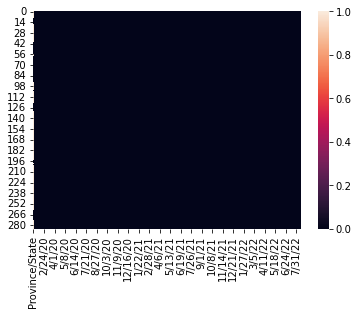

In [8]:
# checking null values
sns.heatmap(deaths_df.isnull())

In [9]:
# if i want to drop or replace null values
# deaths_df.dropna()
# deaths_df.fillna(0)

In [10]:
# Drop unnecessary columns deaths data frame
deaths_df = deaths_df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1)
deaths_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,Albania,0,0,0,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,Algeria,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,Andorra,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,Angola,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5688,5691,5691,5691,5691,5691,5691,5691,5691,5691
281,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,Yemen,0,0,0,0,0,0,0,0,0,...,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
283,Zambia,0,0,0,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


In [11]:
# creating a version of the data just with numbers to apply functions into it
just_dates_deaths_df = deaths_df.drop(columns=['Country/Region'], axis=1)
just_dates_deaths_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,0,0,0,0,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,0,0,0,0,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,0,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,0,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,0,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,5688,5691,5691,5691,5691,5691,5691,5691,5691,5691
281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
283,0,0,0,0,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


In [12]:
# Drop unnecessary columns confirmed data frame
confirmed_df = confirmed_df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1)
confirmed_df 

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,Albania,0,0,0,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,Algeria,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,Andorra,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,Angola,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5688,5691,5691,5691,5691,5691,5691,5691,5691,5691
281,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,Yemen,0,0,0,0,0,0,0,0,0,...,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
283,Zambia,0,0,0,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


In [13]:
deaths_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,...,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02,2.850000e+02
mean,0.059649,0.063158,0.091228,0.147368,0.196491,0.287719,0.459649,0.466667,0.600000,0.747368,...,2.252035e+04,2.252802e+04,2.254012e+04,2.255275e+04,2.256383e+04,2.257340e+04,2.257808e+04,2.258121e+04,2.258924e+04,2.260107e+04
std,1.006993,1.008526,1.423678,2.370454,3.081634,4.502897,7.404506,7.405017,9.596508,12.083893,...,8.894258e+04,8.897056e+04,8.901074e+04,8.905908e+04,8.910177e+04,8.914110e+04,8.914906e+04,8.915253e+04,8.918266e+04,8.921449e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.100000e+01,6.100000e+01,6.100000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.740000e+02,8.740000e+02,8.740000e+02,8.740000e+02,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02,8.750000e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03,8.529000e+03
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,1.033763e+06,1.034209e+06,1.034791e+06,1.035706e+06,1.036325e+06,1.036990e+06,1.037017e+06,1.037021e+06,1.037461e+06,1.037935e+06


In [14]:
# creating a version of the confirmed data frame with just numbers to apply functions into it
just_dates_confirmed_df = confirmed_df.drop(columns=['Country/Region'], axis=1)
just_dates_confirmed_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/7/22,8/8/22,8/9/22,8/10/22,8/11/22,8/12/22,8/13/22,8/14/22,8/15/22,8/16/22
0,0,0,0,0,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,0,0,0,0,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,0,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,0,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,0,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,5688,5691,5691,5691,5691,5691,5691,5691,5691,5691
281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
283,0,0,0,0,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


In [15]:
#function to change the format of the dates(columns names) from 'm/d/yy' to 'yyyy-mm-dd'
from datetime import date 

def format_date():

    
    dates = list(just_dates_deaths_df.columns.values)
    formated_dates = []
    date_map = {}
    
    for i, d in enumerate(dates): 
        
        d_format = d.split('/')
        
        if len(d_format[0]) < 2:
            d_format[0] = '0'+ d_format[0] 
            
        if len(d_format[1]) < 2:
            d_format[1] = '0'+ d_format[1]
            
        d_format[2] = '20'+ d_format[2]
        
        date_transformed = date.fromisoformat(f'{d_format[2]}-{d_format[0]}-{d_format[1]}')
        
        date_map[d] = f'{d_format[2]}-{d_format[0]}-{d_format[1]}'
        
        formated_dates.append(date_transformed)
    
    return formated_dates, date_map
    
formated_dates, d_map = format_date()
formated_dates

[datetime.date(2020, 1, 22),
 datetime.date(2020, 1, 23),
 datetime.date(2020, 1, 24),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 1, 26),
 datetime.date(2020, 1, 27),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 1, 29),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 2, 2),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 5),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 2, 7),
 datetime.date(2020, 2, 8),
 datetime.date(2020, 2, 9),
 datetime.date(2020, 2, 10),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 13),
 datetime.date(2020, 2, 14),
 datetime.date(2020, 2, 15),
 datetime.date(2020, 2, 16),
 datetime.date(2020, 2, 17),
 datetime.date(2020, 2, 18),
 datetime.date(2020, 2, 19),
 datetime.date(2020, 2, 20),
 datetime.date(2020, 2, 21),
 datetime.date(2020, 2, 22),
 datetime.date(2020, 2, 23),
 datetime.date(2020, 2, 24),
 datetime.date(2020, 2,

In [16]:
d_map

{'1/22/20': '2020-01-22',
 '1/23/20': '2020-01-23',
 '1/24/20': '2020-01-24',
 '1/25/20': '2020-01-25',
 '1/26/20': '2020-01-26',
 '1/27/20': '2020-01-27',
 '1/28/20': '2020-01-28',
 '1/29/20': '2020-01-29',
 '1/30/20': '2020-01-30',
 '1/31/20': '2020-01-31',
 '2/1/20': '2020-02-01',
 '2/2/20': '2020-02-02',
 '2/3/20': '2020-02-03',
 '2/4/20': '2020-02-04',
 '2/5/20': '2020-02-05',
 '2/6/20': '2020-02-06',
 '2/7/20': '2020-02-07',
 '2/8/20': '2020-02-08',
 '2/9/20': '2020-02-09',
 '2/10/20': '2020-02-10',
 '2/11/20': '2020-02-11',
 '2/12/20': '2020-02-12',
 '2/13/20': '2020-02-13',
 '2/14/20': '2020-02-14',
 '2/15/20': '2020-02-15',
 '2/16/20': '2020-02-16',
 '2/17/20': '2020-02-17',
 '2/18/20': '2020-02-18',
 '2/19/20': '2020-02-19',
 '2/20/20': '2020-02-20',
 '2/21/20': '2020-02-21',
 '2/22/20': '2020-02-22',
 '2/23/20': '2020-02-23',
 '2/24/20': '2020-02-24',
 '2/25/20': '2020-02-25',
 '2/26/20': '2020-02-26',
 '2/27/20': '2020-02-27',
 '2/28/20': '2020-02-28',
 '2/29/20': '2020-02-

In [17]:
# using the d_map to change the columns names and redifining the df
just_dates_deaths_df = just_dates_deaths_df.rename(columns = d_map)
just_dates_deaths_df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16
0,0,0,0,0,0,0,0,0,0,0,...,7752,7753,7753,7753,7755,7755,7758,7758,7759,7759
1,0,0,0,0,0,0,0,0,0,0,...,3563,3566,3566,3567,3568,3569,3570,3571,3571,3573
2,0,0,0,0,0,0,0,0,0,0,...,6878,6878,6878,6878,6878,6878,6878,6878,6878,6878
3,0,0,0,0,0,0,0,0,0,0,...,154,154,154,154,154,154,154,154,154,154
4,0,0,0,0,0,0,0,0,0,0,...,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,0,0,0,0,0,...,5688,5691,5691,5691,5691,5691,5691,5691,5691,5691
281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282,0,0,0,0,0,0,0,0,0,0,...,2152,2152,2152,2152,2152,2152,2152,2152,2152,2152
283,0,0,0,0,0,0,0,0,0,0,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016


# step 4: making the plots

In [18]:
# Getting all the dates, daily increase and moving averages for the on going pandemic (the data sets are updated daily)
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [19]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)

In [20]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [21]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [22]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

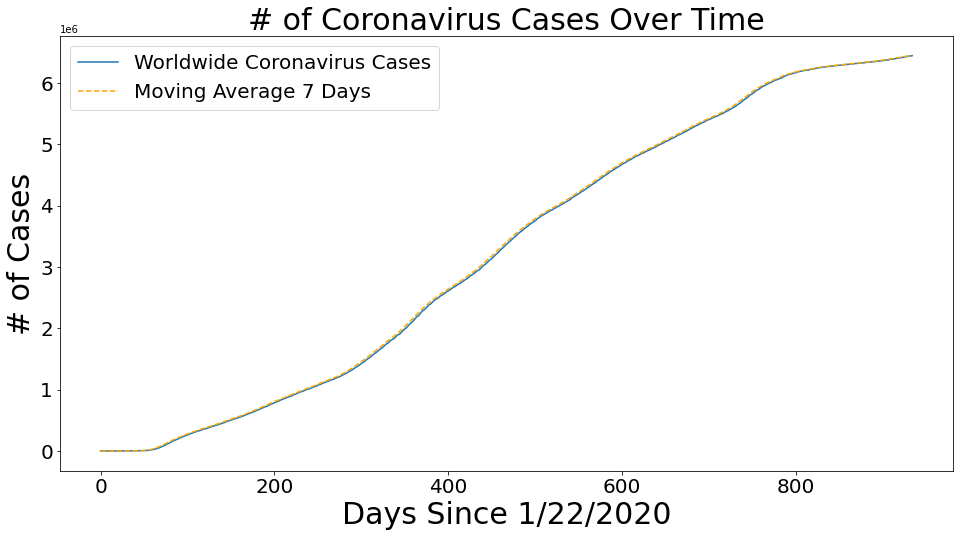

In [23]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



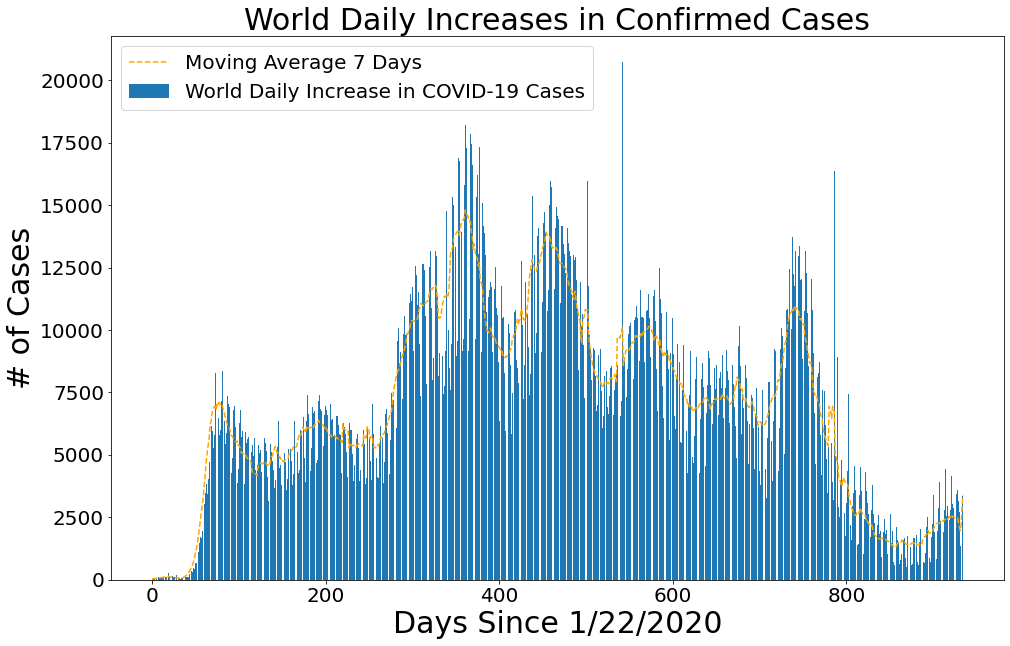

In [24]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Choosing the country

In [25]:
inp_country = 'Israel'

deaths_df = deaths_df.rename(columns = d_map)
choosen_country = deaths_df.loc[deaths_df['Country/Region'] == inp_country]
choosen_country = choosen_country.drop(columns=['Country/Region'], axis=1)
choosen_country

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16
153,0,0,0,0,0,0,0,0,0,0,...,11436,11449,11470,11470,11483,11483,11483,11501,11503,11505


In [ ]:
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    


In [ ]:
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']


plt.figure(figsize=(12, 8))
plt.plot(get_country_info('Israel')[num])
plt.legend(get_country_info('Israel')[num], prop={'size': 20})
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases in Israel', size=30)
plt.title(graph_name[num], size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [ ]:
deaths_df = pd.DataFrame(data=deaths_df)
deaths_df = deaths_df.T
deaths_df

In [ ]:
choosen_country = pd.DataFrame
type(just_dates_deaths_df)

# Choosing the dates 

In [ ]:
all_dates = list(d_map.values())
all_dates

In [ ]:
#choosing start and end date
date_start = date(2022, 7, 20)
date_end = date(2022, 8, 5)


In [ ]:
def choossing_dates(country):
    global choosen_dates 
    choosen_dates=[]
    for column in country.columns:
        current_date = date.fromisoformat(column)
        if date_start <= current_date <= date_end:
            choosen_dates.append(str(current_date))
    return choosen_dates

choossing_dates(choosen_country)



In [ ]:
total_deaths_per_day = just_dates_deaths_df.sum(axis=0)
total_deaths_per_day


In [ ]:
# def deaths_perday(date):
just_dates_deaths_df['2022-08-08'].sum(axis=0)

In [ ]:
countries_by_number = deaths_df['Country/Region']
countries_by_number

In [ ]:
total_deaths_per_country = just_dates_deaths_df.sum(axis=1)
total_deaths_per_country

In [ ]:
# Total deaths worldwide
total_deaths_world = total_deaths_per_country.sum()
total_deaths_world 

# GUI with Tkinter

In [ ]:
from tkinter.ttk import *



# functions to create the selector box

window=Tk()
# window
window.title('Covid-19 Counter')


# label for country entry
lbl=Label(window, text="Select Country", font=("Helvetica", 16)).grid(row=0, column=0, sticky=W)
country = Combobox(window).grid(row=0, column =1, sticky=E)

# checkbuttons for global

Checkbutton1 = IntVar()  
Checkbutton2 = IntVar()  

button1 = Checkbutton(window, text = "Global", 
#                       variable = global,
                      onvalue = True,
                      offvalue = False,
                      width = 10).grid(row=1, column =1)

# labels for selecting dates
lbl2=Label(window, text="Select start date", font=("Helvetica", 16)).grid(row=5, column=0, sticky=W)  
start_date = Combobox(window).grid(row=5, column =1, sticky=W)

lbl3=Label(window, text="Select end date", font=("Helvetica", 16)).grid(row=6, column=0, sticky=E)  
end_date = Combobox(window).grid(row=6, column =1, sticky=W)

# checkboxes fot selected dates
r1=Radiobutton(window, text="Last three months", value=1).grid(row=7, column =0, sticky=W)
r2=Radiobutton(window, text="Last week", value=2).grid(row=8, column =0, sticky=W)

# list of Countries
# countries_list = tk.StringVar()
# combobox = ttk.Combobox(container, textvariable=current_var)

# search button
btn = Button(window, text = 'Search', 
                          command = window.destroy).grid(row=9, column =1)
 
 

window.mainloop()